In [1]:
import json
import timeit
import builtins
import matplotlib.pyplot as plt
import numpy as np

class Skill:
    all_skill = []
    def __init__(self, name, parent_skill=None):
        self.name = name
        self.parent_skills = []
        self.children_skills = []
        Skill.all_skill.append(self)

        if parent_skill:
            if isinstance(parent_skill, list):
                self.parent_skills = parent_skill
                for each_parent in parent_skill:
                    if self not in each_parent.children_skills:
                        each_parent.children_skills.append(self)
            else:
                self.parent_skills = [parent_skill]
                if self not in parent_skill.children_skills:
                    parent_skill.children_skills.append(self)

    def __repr__(self):
        return f"Skill Name={self.name}"

In [2]:
def skill_path_req(skill, owned_skills, log=None, skill_requirements=None):
    if log is None:
        log = set()

    if skill_requirements is None:
        skill_requirements = {}

    total_path_req = 0

    for parent_skill in skill.parent_skills:
        if parent_skill in log:
            continue

        log.add(parent_skill)

        if parent_skill in owned_skills:
            continue

        total_path_req += skill_path_req(parent_skill, owned_skills, log, skill_requirements)

    total_path_req += 1

    skill_requirements[skill.name] = total_path_req

    return total_path_req

def get_skill_requirements(skill, owned_skills):
    skill_requirements = {}
    skill_path_req(skill, owned_skills, skill_requirements=skill_requirements)
    return skill_requirements

def find_max_unlockable_skill(skill, owned_skills,skill_point):
    
    skills_requirement = get_skill_requirements(skill, owned_skills)
    skills_requirement_reversed = {v:k for k,v in skills_requirement.items()}

    if skill_point in skills_requirement_reversed:
        
        skills_can_unlocked = [skill_can_unlock for skill_can_unlock,req in skills_requirement.items() if req <= skill_point]

        return skills_can_unlocked
    else:
        return None

def unlock_skill_rekursif(skill, owned_skills, skill_point):
    print(f'Ini Adalah REKURSIF')
    if skill in owned_skills:
        print("Anda sudah memiliki skill tersebut.")
        return skill_point
    
    required_points = skill_path_req(skill, owned_skills)

    if skill_point >= required_points:
        def unlock_parents(current_skill):
            for parent_skill in current_skill.parent_skills:
                if parent_skill not in owned_skills:
                    unlock_parents(parent_skill)
                    owned_skills.add(parent_skill)

        unlock_parents(skill)
        owned_skills.add(skill)

        skill_point -= required_points
        print(f"Skill '{skill.name}' berhasil diambil! Poin tersisa: {skill_point}")
    else:
        print(f"Poin tidak cukup! Dibutuhkan {required_points} poin untuk membuka skill '{skill.name}', sedangkan skill point Anda {skill_point}.")

        unlockable = find_max_unlockable_skill(skill, owned_skills, skill_point)
        if unlockable:
            print(f"Anda hanya bisa mengambil: {unlockable}")
        else:
            print("Dapatkan skill point lagi.")

    return skill_point

In [3]:
def skill_path_req_iteratif(skill, owned_skills, log=None, skill_requirements=None):
    if log is None:
        log = set()

    if skill_requirements is None:
        skill_requirements = {}

    stack = [(skill, 0)]
    visited = set()
    total_path_req = 0

    while stack:
        current_skill, path_req = stack.pop()

        if current_skill in visited:
            continue
        visited.add(current_skill)

        if current_skill in owned_skills:
            skill_requirements[current_skill.name] = 0  
            continue

        total_path_req += 1

        if current_skill not in log:
            log.add(current_skill)

        for parent_skill in current_skill.parent_skills:
            if parent_skill not in visited:
                stack.append((parent_skill, path_req + 1))

        skill_requirements[current_skill.name] = total_path_req

    return total_path_req

def get_skill_requirements_iteratif(skill, owned_skills):
    skill_requirements = {}
    skill_path_req_iteratif(skill, owned_skills, skill_requirements=skill_requirements)
    return skill_requirements

def find_max_unlockable_skill_iteratif(skill, owned_skills,skill_point):
    
    skills_requirement = get_skill_requirements_iteratif(skill, owned_skills)
    skills_requirement_reversed = {v:k for k,v in skills_requirement.items()}

    if skill_point in skills_requirement_reversed:
        
        skills_can_unlocked = [skill_can_unlock for skill_can_unlock,req in skills_requirement.items() if req <= skill_point]

        return skills_can_unlocked
    else:
        return None
    
def unlock_skill_iteratif(skill, owned_skills, skill_point):
    print(f'Ini Adalah ITERATIF')
    if skill in owned_skills:
        print("Anda sudah memiliki skill tersebut.")
        return skill_point
    
    required_points = skill_path_req_iteratif(skill, owned_skills)

    if skill_point >= required_points:
        def unlock_parents(current_skill):
            for parent_skill in current_skill.parent_skills:
                if parent_skill not in owned_skills:
                    unlock_parents(parent_skill)
                    owned_skills.add(parent_skill)

        unlock_parents(skill)
        owned_skills.add(skill)

        skill_point -= required_points
        print(f"Skill '{skill.name}' berhasil diambil! Poin tersisa: {skill_point}")
    else:
        print(f"Poin tidak cukup! Dibutuhkan {required_points} poin untuk membuka skill '{skill.name}', sedangkan skill point Anda {skill_point}.")

        unlockable = find_max_unlockable_skill_iteratif(skill, owned_skills, skill_point)
        if unlockable:
            print(f"Anda hanya bisa mengambil: {unlockable}")
        else:
            print("Dapatkan skill point lagi.")

    return skill_point

In [4]:
skill_file_json='D:/Iyan/jupyter/semes_3/skill_tree.json'

with open(skill_file_json, 'r') as file:
    skills_data = json.load(file)

skills_dict = {}

for skill_data in skills_data:
    name = skill_data["name"]
    parent_skills = skill_data["parent_skills"]
    
    parent_skill_2 = [skills_dict[parent_name] for parent_name in parent_skills]
    
    skill_instance = Skill(name, parent_skill_2)
    skills_dict[name] = skill_instance

for skill in skills_dict.values():
    print(skill)

Skill Name=Nully
Skill Name=Charge
Skill Name=Sword Mastery
Skill Name=Shield Wall
Skill Name=Battle Cry
Skill Name=Defensive Stance
Skill Name=Power Strike
Skill Name=Enrage
Skill Name=Shield Bash
Skill Name=Cleave
Skill Name=Berserk
Skill Name=Warcry
Skill Name=Iron Fist
Skill Name=Earthquake
Skill Name=Whirlwind
Skill Name=Reckless Charge
Skill Name=Unbreakable
Skill Name=Fury Blast
Skill Name=Thunder Strike
Skill Name=Spin Attack
Skill Name=Berserker Rage
Skill Name=Indomitable
Skill Name=Rage of the Warrior
Skill Name=Devastating Strike
Skill Name=Whirlwind Mastery
Skill Name=Unleash Fury
Skill Name=Fortitude
Skill Name=Battle Lord
Skill Name=Colossus Smash
Skill Name=Whirlwind Legend
Skill Name=Blood Fury
Skill Name=Immovable
Skill Name=Warrior King
Skill Name=Divine Strike
Skill Name=Tempest Fury
Skill Name=Ground Breaker
Skill Name=Whirlwind King
Skill Name=Fury of the Warrior
Skill Name=The Unyielding
Skill Name=Imperial Warrior
Skill Name=Earthshaker
Skill Name=Whirlwind Mast

In [5]:
owned_skill_rekursif = set()
owned_skill_rekursif.add(skills_dict['Nully'])
skill_poin_rekursif = 2
skill_poin_rekursif = unlock_skill_rekursif(skills_dict['Divine Strike'],owned_skill_rekursif,skill_poin_rekursif)

display(owned_skill_rekursif)

Ini Adalah REKURSIF
Poin tidak cukup! Dibutuhkan 15 poin untuk membuka skill 'Divine Strike', sedangkan skill point Anda 2.
Anda hanya bisa mengambil: ['Charge', 'Sword Mastery', 'Battle Cry', 'Warcry']


{Skill Name=Nully}

In [6]:
owned_skill_iteratif = set()
owned_skill_iteratif.add(skills_dict['Nully'])
skill_poin_iteratif = 2
skill_poin_iteratif = unlock_skill_iteratif(skills_dict['Divine Strike'],owned_skill_iteratif,skill_poin_iteratif)

display(owned_skill_iteratif)

Ini Adalah ITERATIF
Poin tidak cukup! Dibutuhkan 15 poin untuk membuka skill 'Divine Strike', sedangkan skill point Anda 2.
Anda hanya bisa mengambil: ['Divine Strike', 'Warrior King', 'Nully']


{Skill Name=Nully}

In [7]:
skill_poin_rekursif = 25
skill_poin_rekursif = unlock_skill_rekursif(skills_dict['Divine Strike'],owned_skill_rekursif,skill_poin_rekursif)

display(owned_skill_rekursif)

Ini Adalah REKURSIF
Skill 'Divine Strike' berhasil diambil! Poin tersisa: 10


{Skill Name=Battle Cry,
 Skill Name=Battle Lord,
 Skill Name=Charge,
 Skill Name=Colossus Smash,
 Skill Name=Devastating Strike,
 Skill Name=Divine Strike,
 Skill Name=Earthquake,
 Skill Name=Fury Blast,
 Skill Name=Nully,
 Skill Name=Rage of the Warrior,
 Skill Name=Shield Bash,
 Skill Name=Shield Wall,
 Skill Name=Sword Mastery,
 Skill Name=Thunder Strike,
 Skill Name=Warcry,
 Skill Name=Warrior King}

In [8]:
skill_poin_iteratif = 25
skill_poin_iteratif = unlock_skill_iteratif(skills_dict['Divine Strike'],owned_skill_iteratif,skill_poin_iteratif)

display(owned_skill_iteratif)

Ini Adalah ITERATIF
Skill 'Divine Strike' berhasil diambil! Poin tersisa: 10


{Skill Name=Battle Cry,
 Skill Name=Battle Lord,
 Skill Name=Charge,
 Skill Name=Colossus Smash,
 Skill Name=Devastating Strike,
 Skill Name=Divine Strike,
 Skill Name=Earthquake,
 Skill Name=Fury Blast,
 Skill Name=Nully,
 Skill Name=Rage of the Warrior,
 Skill Name=Shield Bash,
 Skill Name=Shield Wall,
 Skill Name=Sword Mastery,
 Skill Name=Thunder Strike,
 Skill Name=Warcry,
 Skill Name=Warrior King}

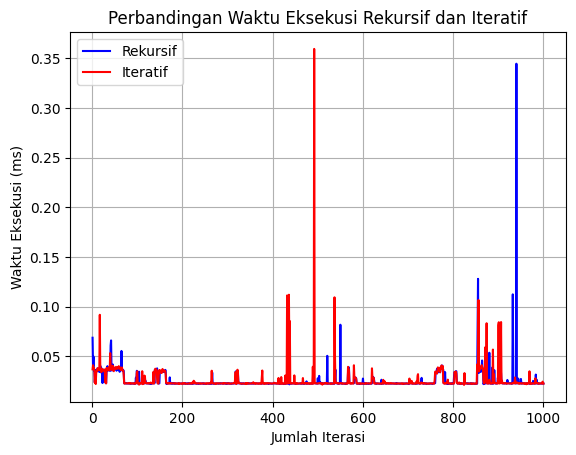

Rata-rata Waktu Rekursif 0.025423501036129892
Rata-rata Waktu Iteratif 0.025986999389715493


In [9]:
def suppress_print(*args, **kwargs):
    pass

original_print = builtins.print
builtins.print = suppress_print

owned_skill = set()
owned_skill.add(skills_dict['Nully'])
skill_point = 15
skill_to_unlock = skills_dict['Divine Strike']

Waktu_rekursif = []
Waktu_iteratif = []

for i in range(1, 1001):
    time_recursive = timeit.timeit('unlock_skill_rekursif(skill_to_unlock, owned_skill, skill_point)', globals=globals(), number=100)
    time_iterative = timeit.timeit('unlock_skill_iteratif(skill_to_unlock, owned_skill, skill_point)', globals=globals(), number=100)
    
    Waktu_rekursif.append(time_recursive * 1000)
    Waktu_iteratif.append(time_iterative * 1000)

builtins.print = original_print

plt.plot(range(1, 1001), Waktu_rekursif, label='Rekursif', color='b')
plt.plot(range(1, 1001), Waktu_iteratif, label='Iteratif', color='r')
plt.xlabel('Jumlah Iterasi')
plt.ylabel('Waktu Eksekusi (ms)')
plt.title('Perbandingan Waktu Eksekusi Rekursif dan Iteratif')
plt.legend()
plt.grid(True)
plt.show()

print(f'Rata-rata Waktu Rekursif {np.mean(Waktu_rekursif)}')
print(f'Rata-rata Waktu Iteratif {np.mean(Waktu_iteratif)}')